In [2]:
from keras.datasets import imdb
import numpy as np

In [3]:
# Loading the IMDB Data set
# num_words=10000 means keeping the top 10,000 most frequently occurring words in the training data
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [5]:
# Preparing the data and making it ready to be fed into a neural network
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
	# creates an all-zero matrix of shape 
	results = np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		# sets specific indices of results[i] to 1s
		results[i, sequence] = 1
	return results

# Vectorize Training data
x_train = vectorize_sequences(train_data)

#Vectorize test data
x_test = vectorize_sequences(test_data)

# Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [16]:
# The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling the model
model.compile(
	optimizer='rmsprop',
	loss='binary_crossentropy',
	metrics=['accuracy']
	)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4362 - accuracy: 0.8256
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2516 - accuracy: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.1953 - accuracy: 0.9295
Epoch 4/4
25000/25000 [==============================] - 3s 101us/step


In [17]:
# This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.
results


[0.29697418256759645, 0.8825600147247314]

In [18]:
# generate predictions
model.predict(x_test)

array([[0.16538502],
       [0.9999002 ],
       [0.77290714],
       ...,
       [0.09522235],
       [0.07184319],
       [0.647887  ]], dtype=float32)

In [20]:
# Validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1370 - accuracy: 0.9533 - val_loss: 0.1413 - val_accuracy: 0.9517
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1115 - accuracy: 0.9632 - val_loss: 0.1643 - val_accuracy: 0.9386
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0925 - accuracy: 0.9708 - val_loss: 0.1849 - val_accuracy: 0.9290
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.2016 - val_accuracy: 0.9244
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.0648 - accuracy: 0.9815 - val_loss: 0.2142 - val_accuracy: 0.9210
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.0529 - accuracy: 0.9863 - val_loss: 0.2358 - val_accuracy: 0.9179
Epoch 7/20
15000/15000 [==============================] - 1s 78us/s

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

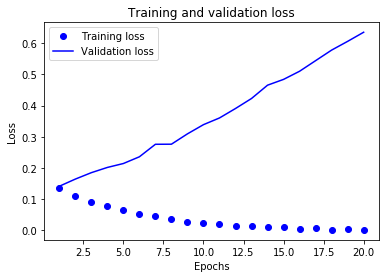

In [26]:
# plotting the training and validation loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


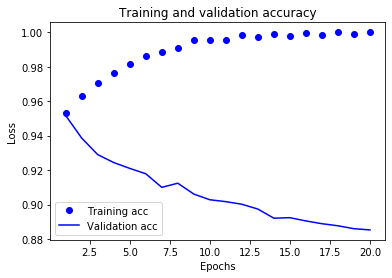

In [27]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
# Further  experiments
# 1) Using 3 hidden layers instead of 2

from keras import models
from keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

# compiling the model
model_1.compile(
	optimizer='rmsprop',
	loss='binary_crossentropy',
	metrics=['accuracy']
)
model_1.fit(x_train, y_train, epochs=4, batch_size=512)
results_1 = model_1.evaluate(x_test, y_test)
results_1

Epoch 1/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.4849 - accuracy: 0.8049
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2714 - accuracy: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2008 - accuracy: 0.9303 0s - loss: 0
Epoch 4/4
25000/25000 [==============================] - 2s 99us/step


[0.30356411926269533, 0.8831999897956848]

In [7]:
# Further  experiments
# 1) using 3 hidden layers still
# 2) additionally using layers with more hidden units: 64

from keras import models
from keras import layers

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

# compiling the model
model_2.compile(
	optimizer='rmsprop',
	loss='binary_crossentropy',
	metrics=['accuracy']
)
model_2.fit(x_train, y_train, epochs=4, batch_size=512)
results_2 = model_2.evaluate(x_test, y_test)
results_2


Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4303 - accuracy: 0.8077
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2391 - accuracy: 0.9075
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1802 - accuracy: 0.9316
Epoch 4/4
25000/25000 [==============================] - 3s 139us/step


[0.3471760097694397, 0.8767600059509277]